In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r"water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


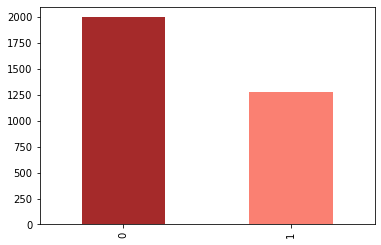

In [6]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

In [7]:
X = df.drop('Potability', axis=1)

In [8]:
Y = df['Potability']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=8, splitter='random')
dt.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=8,
                       splitter='random')

In [18]:
prediction = dt.predict(X_test)
accuracy_dt = accuracy_score(Y_test, prediction) * 100
accuracy_dt

58.6890243902439

In [19]:
accuracy_score(prediction, Y_test) * 100

58.6890243902439

In [13]:
dt.get_params().keys()


dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [15]:
#example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2, 4, 6, 8, 10]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                              scoring='accuracy', error_score=0)
grid_search_dt.fit(X_train, Y_train)

# summarize results
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

print("Training Score:", grid_search_dt.score(X_train, Y_train) * 100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test) * 100)

Best: 0.595 using {'criterion': 'entropy', 'min_samples_split': 8, 'splitter': 'random'}
0.580 (0.035) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.570 (0.031) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.582 (0.036) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.578 (0.033) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.586 (0.031) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.585 (0.030) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.587 (0.028) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.588 (0.022) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.590 (0.027) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.576 (0.022) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.586 (0.034) with: {'criterion': 'entr

In [16]:
grid_search_dt.best_params_

{'criterion': 'entropy', 'min_samples_split': 8, 'splitter': 'random'}

In [20]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(dt, pickle_out)
pickle_out.close()